<h1><center>Predicitive Model</center></h1>

 <h2><center> Using soccer player's statistics to predict Preferred Position</center></h2>


### IMPORTED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

this notebook will aim to build a predictive model on a player's preferred soccer position based on it's soccer statistics. First, the raw dataset will be imported and the columns will be displayed to select and build a first selection of characteristics to be further analysed.

In [2]:
dff_raw = pd.read_csv('CompleteDataset.csv')
dff_raw.head(10)

C:\Users\ketel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


Above the full dataset is displayed on its first 10 rows, from here around 22 columns will be selected for the correlation analysis to determine the final dataset. in order to prepare all columns for correlation some will be adjusted as can be seen below.

## CLEANING THE DATASET

In [3]:
dff_raw['Preferred Positions'] = dff_raw['Preferred Positions'].str[:3] #select first 3 as soccer roles have a max of 3 characters
dff_raw['Preferred Positions'].unique()
dff_raw['Value'] = dff_raw['Value'].str.replace('€','')
dff_raw['Value'] = dff_raw['Value'].str.replace('M','000000')
dff_raw['Value'] = dff_raw['Value'].str.replace('.','')
dff_raw['Value'] = dff_raw['Value'].str.replace('K','000')
dff_raw['Wage'] = dff_raw['Wage'].str.replace('K','000')
dff_raw['Wage'] = dff_raw['Wage'].str.replace('€','')
dff_raw2 = dff_raw.replace('\+','',regex=True)
dff_raw3 = dff_raw2.replace('\-','',regex=True)





C:\Users\ketel\AppData\Local\Temp/ipykernel_2908/802660444.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dff_raw['Value'] = dff_raw['Value'].str.replace('.','')


In order to clean the dataset, first for the columns of Value and wage their format was changed to display only numerics. Next the special characters + and - were removed from the raw data in order to transform the columns to numeric.

In [4]:
dff_raw3 = dff_raw3[['Age', 'Overall',
       'Potential', 'Value', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']].apply(pd.to_numeric,axis =1)
dff_raw3['Preferred Positions'] = dff_raw['Preferred Positions']
dff_raw3.head(5)


,Age,Overall,Potential,Value,Special,Acceleration,Aggression,Agility,Balance,Ball control,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,32,94,94,955000000,2228,89,63,89,63,93,...,83,94,23,91,92,31,80,85,88,ST
1,30,93,93,105000000,2154,92,48,90,95,95,...,88,85,26,87,73,28,59,90,85,RW
2,25,92,94,123000000,2100,94,56,96,82,95,...,81,80,33,90,78,24,53,80,83,LW
3,30,92,92,97000000,2291,88,78,86,60,91,...,83,87,38,77,89,45,80,84,88,ST
4,31,92,92,61000000,1493,58,29,52,35,48,...,55,25,11,61,44,10,83,70,11,GK


In [5]:
dff_raw4 = dff_raw3[ dff_raw3['Potential'] & dff_raw3['Overall'] &
                   (dff_raw3['Acceleration'] < 101)
                   & (dff_raw3['Aggression'] < 101) & (dff_raw3['Agility'] < 101)
                   & (dff_raw3['Balance'] < 101) & (dff_raw3['Ball control'] < 101) & (dff_raw3['Composure'] < 101) & (dff_raw3['Crossing'] < 101)
                   & (dff_raw3['Curve'] < 101) & (dff_raw3['Dribbling'] < 101) & (dff_raw3['Finishing'] < 101) & (dff_raw3['Free kick accuracy'] < 101) & (dff_raw3['GK diving'] < 101) & (dff_raw3['GK handling'] < 101)
                    & (dff_raw3['Interceptions'] < 101) & (dff_raw3['Long passing'] < 101)  & (dff_raw3['Long shots'] < 101) & (dff_raw3['Positioning'] < 101)
                    & (dff_raw3['Reactions'] < 101) & (dff_raw3['Short passing'] < 101) & (dff_raw3['Shot power'] < 101)  & (dff_raw3['Sliding tackle'] < 101)
                    & (dff_raw3['Sprint speed'] < 101) & (dff_raw3['Stamina'] < 101) & (dff_raw3['Strength'] < 101)]
dff_raw4['Preferred Positions'] = dff_raw3['Preferred Positions']
dff_raw4.head(5)

C:\Users\ketel\AppData\Local\Temp/ipykernel_2908/2318809647.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_raw4['Preferred Positions'] = dff_raw3['Preferred Positions']


,Age,Overall,Potential,Value,Special,Acceleration,Aggression,Agility,Balance,Ball control,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
1,30,93,93,105000000,2154,92,48,90,95,95,...,88,85,26,87,73,28,59,90,85,RW
5,28,91,91,92000000,2143,79,80,78,80,89,...,83,88,19,83,79,42,84,78,87,ST
13,28,89,89,675000000,2181,88,80,90,87,87,...,81,84,35,84,85,39,72,83,83,RM
14,31,89,89,57000000,2228,75,62,93,94,92,...,92,73,73,71,82,80,58,90,74,CDM
15,27,89,89,695000000,2263,93,65,77,65,87,...,86,91,52,95,76,55,80,79,76,RW


The code above cleans the data and places all columns in a new dataframe, the primary cleaning of this section exists of removing all rows with variables above the 100 these entries are considered to be mistakes.

In [6]:
df_sub_raw = pd.concat([dff_raw4['Preferred Positions'],dff_raw4['Value'],dff_raw4['Age'],
                        dff_raw4['Acceleration'],dff_raw4['Agility'],dff_raw4['Dribbling'],dff_raw4['Finishing'],dff_raw4['Free kick accuracy'],
                       dff_raw4['GK positioning'], dff_raw4['GK handling'],dff_raw4['Interceptions'],dff_raw4['Long shots'],
                       dff_raw4['Positioning'],dff_raw4['Short passing'],dff_raw4['Shot power'],dff_raw4['Sliding tackle'],dff_raw4['Sprint speed'],dff_raw4['Vision']],axis=1)

In [7]:
df_sub_raw.head(10)


,Preferred Positions,Value,Age,Acceleration,Agility,Dribbling,Finishing,Free kick accuracy,GK positioning,GK handling,Interceptions,Long shots,Positioning,Short passing,Shot power,Sliding tackle,Sprint speed,Vision
1,RW,105000000,30,92,90,97,95,90,14,11,22,88,93,88,85,26,87,90
5,ST,92000000,28,79,78,85,91,84,8,6,39,83,91,83,88,19,83,78
13,RM,675000000,28,88,90,90,85,78,12,10,42,82,86,81,84,35,84,83
14,CDM,57000000,31,75,93,86,71,77,14,9,76,82,79,92,73,73,71,90
15,RW,695000000,27,93,77,89,87,85,5,15,59,90,86,86,91,52,95,79
16,ST,665000000,29,90,86,89,90,72,11,15,24,83,91,79,88,12,84,83
17,CB,38000000,32,68,59,58,33,31,4,3,88,49,28,59,78,90,78,50
18,GK,45000000,39,49,55,26,15,13,90,88,28,13,12,37,39,11,43,50
34,CDM,645000000,24,69,87,90,58,64,15,12,86,58,71,90,56,79,62,88
36,LM,65000000,25,77,78,84,76,87,7,14,55,84,81,89,80,22,74,90


In order to succesfully use correlation tests on the dataframe the columns of wage and value are reformatted to present numerical values without symbols. additionally using the .str method the preferred positions tab was

In [8]:
prefpos_df = pd.get_dummies(df_sub_raw['Preferred Positions'])
df_sub_raw2 = df_sub_raw.drop(columns=['Preferred Positions'], axis = 1)
#df_sub_raw = df_sub_raw.join(prefpos_df)
prefpos_df.head(5)

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


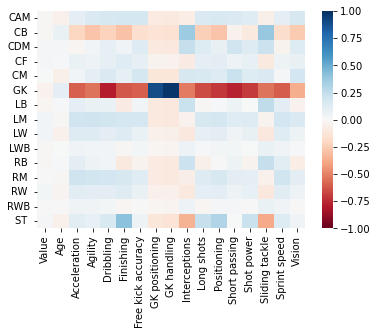

        Value       Age  Acceleration   Agility  Dribbling  Finishing  \
CAM -0.010511 -0.049166      0.100945  0.146059   0.167027   0.176006   
CB  -0.013177  0.063222     -0.218575 -0.288219  -0.226594  -0.289353   
CDM  0.018600  0.017730     -0.022216  0.038821   0.092423   0.039773   
CF   0.021506  0.013856      0.064442  0.056990   0.092473   0.121448   
CM   0.005483 -0.061734      0.036582  0.097229   0.147284   0.089384   
GK  -0.043938  0.096997     -0.598367 -0.544847  -0.782637  -0.621217   
LB  -0.018031  0.010356      0.100599  0.063667   0.068892  -0.085545   
LM   0.036546 -0.015442      0.199829  0.203455   0.194616   0.173487   
LW   0.031820 -0.047032      0.127832  0.126236   0.108692   0.132005   
LWB -0.012302  0.003248      0.042151  0.035275   0.034973  -0.009820   
RB  -0.014768  0.008810      0.102401  0.047858   0.038406  -0.094803   
RM  -0.007554 -0.011438      0.205841  0.191487   0.180294   0.170574   
RW   0.029403 -0.029674      0.115056  0.105277   0

In [9]:
cor_table = pd.concat([df_sub_raw2, prefpos_df], axis=1, keys=['df_sub_raw2', 'prefpos_df']).corr().loc['prefpos_df', 'df_sub_raw2']
sns.heatmap(data=cor_table,cmap='RdBu',vmin = -1, vmax = 1,)
plt.show()
print(cor_table)

the in general most correlating values amongst the characteristics seem to be Acceleration, Agility, Dribbling, Finishing, Interceptions, Short passing, Sliding Tackle, Sprint speed, and Long shots. therefore these will be the characteristics used to form the dataset for the further analysis and prediction model. 

- Note: what can be seen is that the Goal keeper overall corerates very negatively to all characteristics besides GK specific onces, which is understandable.


In [10]:
df_clean_f = pd.concat([df_sub_raw['Preferred Positions'],df_sub_raw['Long shots'],df_sub_raw['Acceleration'],df_sub_raw['Agility'],df_sub_raw['Dribbling'],df_sub_raw['Finishing'],
                           df_sub_raw['Interceptions'],df_sub_raw['Short passing'],df_sub_raw['Sliding tackle'],df_sub_raw['Sprint speed']],axis=1)
df_clean_f.head(3)

,Preferred Positions,Long shots,Acceleration,Agility,Dribbling,Finishing,Interceptions,Short passing,Sliding tackle,Sprint speed
1,RW,88,92,90,97,95,22,88,26,87
5,ST,83,79,78,85,91,39,83,19,83
13,RM,82,88,90,90,85,42,81,35,84


## DESCRIPTIVE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

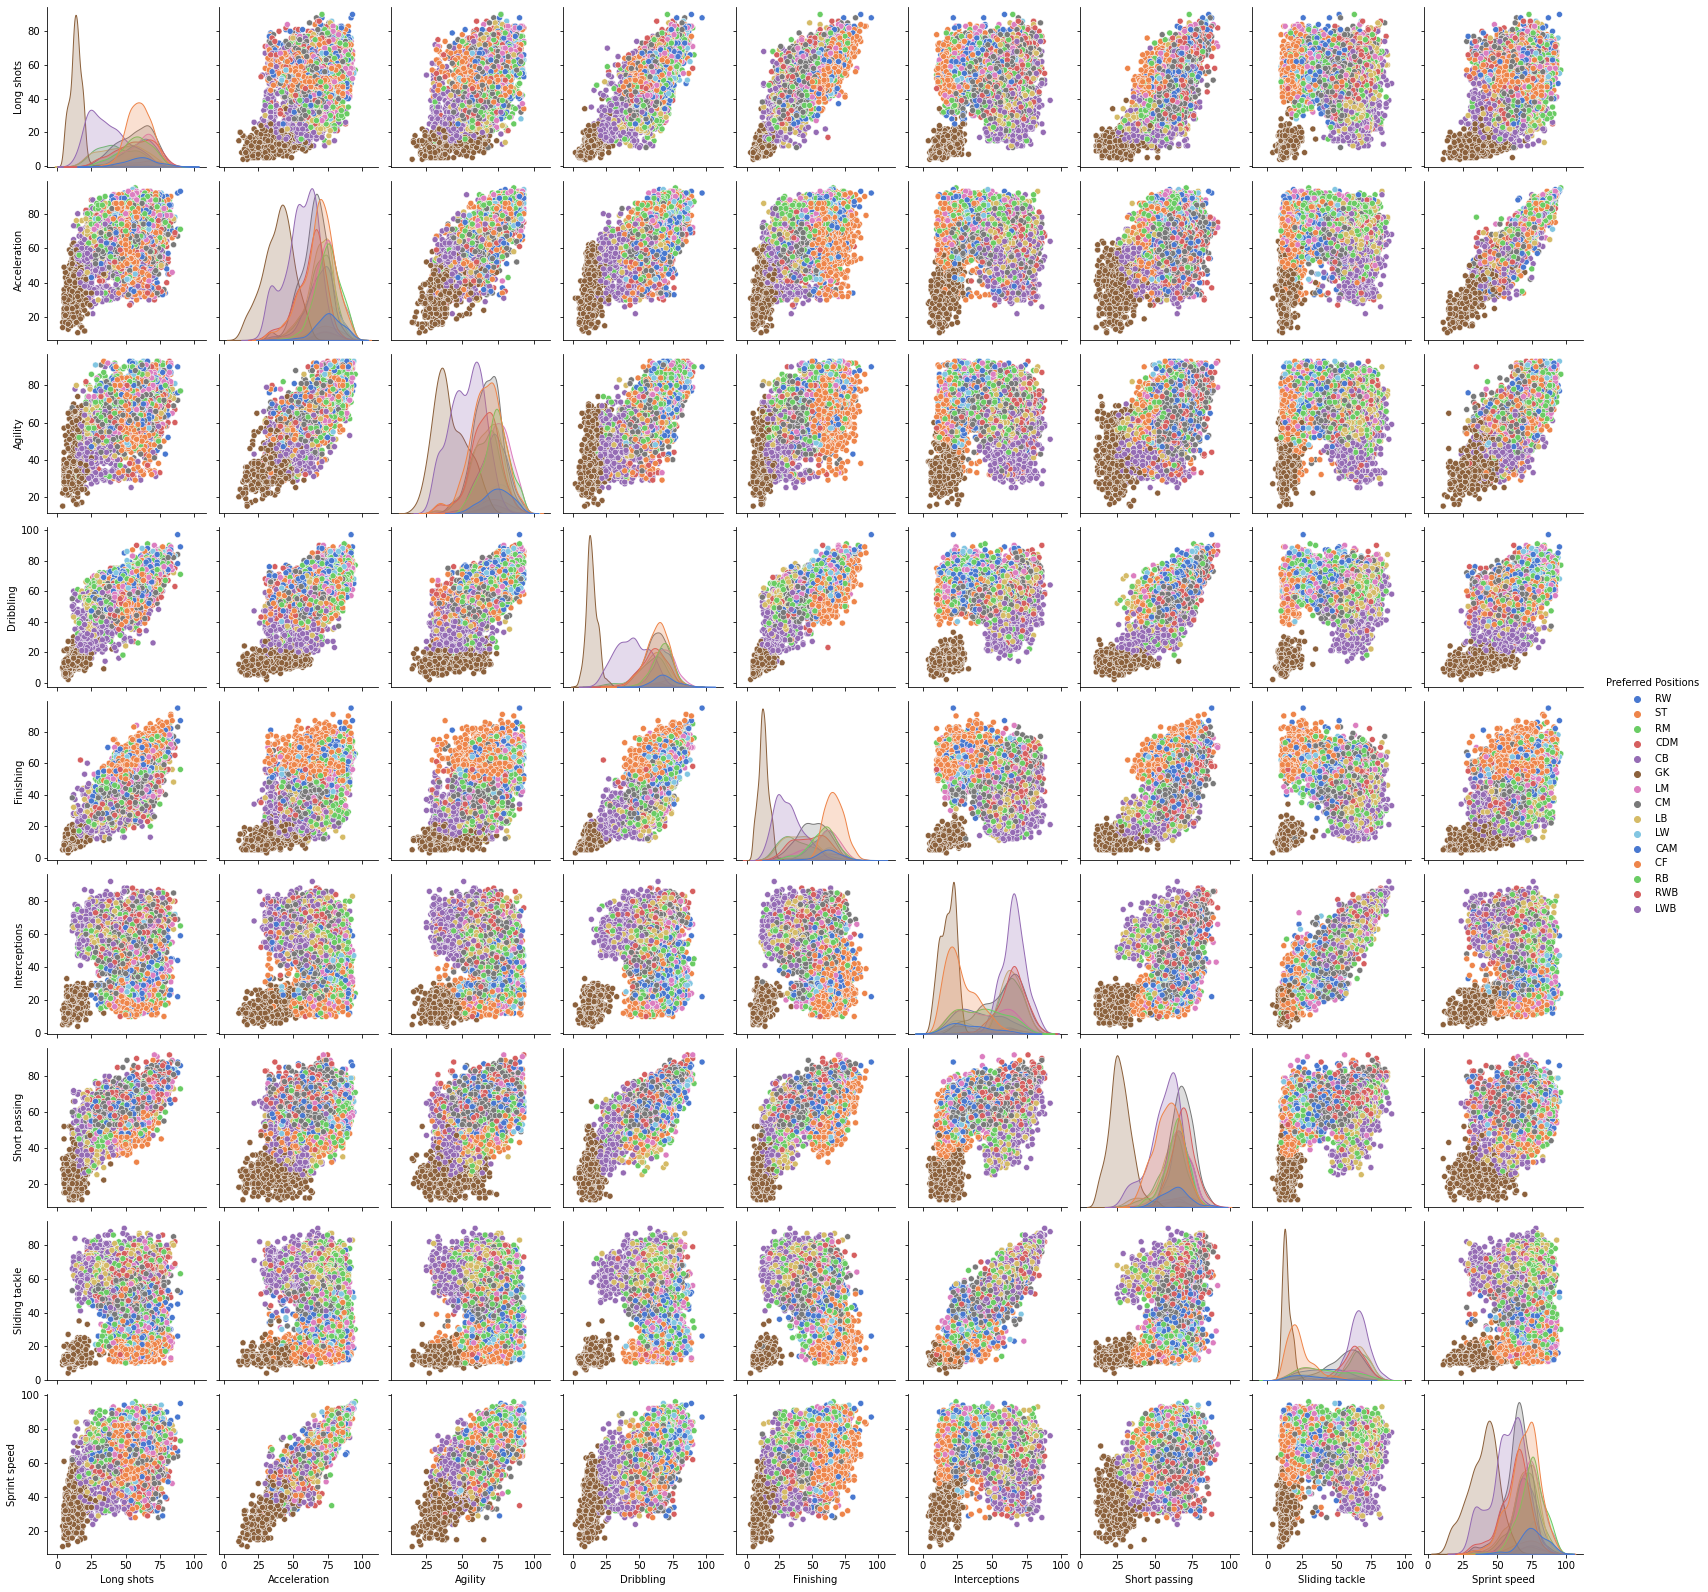

In [11]:

sns.pairplot(data=df_clean_f,hue='Preferred Positions',palette='muted')
plt.show

to start of with some descriptives a pair plot has been build using the newly created dataset. additionally the dots where colored according to their respective position to see if any clear differences exist. these will be listed below.

- Overall the goalkeeper position seems to deviate the most from all soccer positions, colored brown its mainly positionedd at the bottom left indicated lower overall qualities on the chosen characteristics.

- some small correlations an be seen between the variables as the dots are plotted in a somewhat right upward angle. this is especially visible between the variables of Acceleration to Sprintspeed, Interceptions and Sliding tackles, and Short passing to Long shots and to Agility. 

- Furthermore what can be seen is that the ST "striker" position scores overall highest on finishing, while scoring relatively low on interceptions, to which LWB and RWB "Wing defender" positions seem to be scoring higher. 

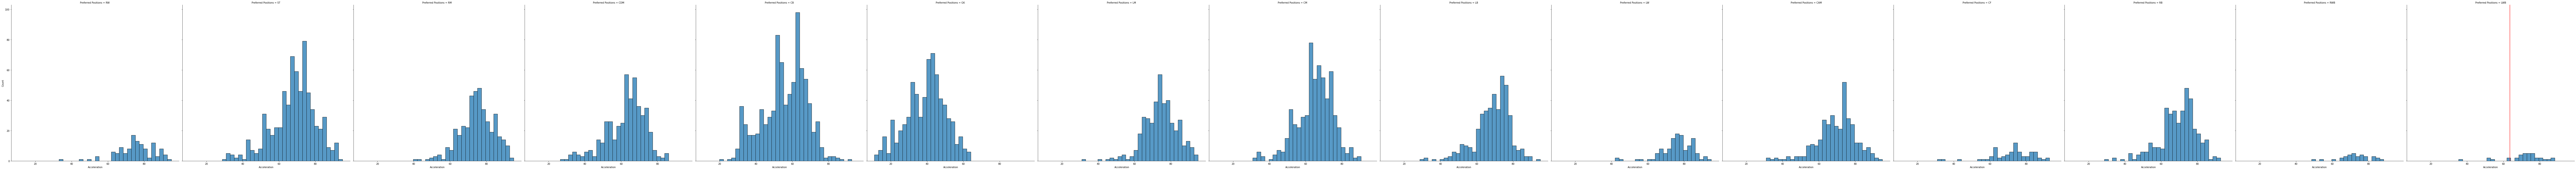

In [12]:
sns.displot(data=df_clean_f, x="Acceleration", col="Preferred Positions", height=10, aspect=1)
plt.axvline(x=df_clean_f.Acceleration.mean(),
            color='red')


By looking further into the distribution of the Variable Acceleration, it can be noted that overall mid and front positions have a slightly higher acceleration score. which is not strange given the type of role in soccer.



<AxesSubplot:>

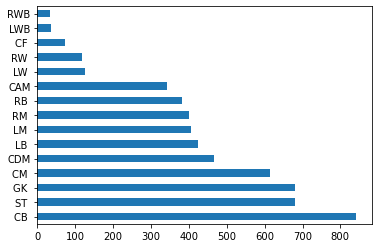

In [13]:
df_clean_f['Preferred Positions'].value_counts()[:20].plot(kind='barh')

Finally a quick distribution of the different different roles is visualized as can be seen above, overall it is expected to get less accurate results for those that have only limited intries in the dataset.

The final step will be to cut down the dataset to a more workable size, this is done below.

In [14]:
df_forml = df_clean_f.head(4000)

## PREDICTIVE MODEL - KNN

Now that the datacleaning and descriptive analysis are finished the machine learning steps can start. for this step the KNNor K- Nearest Neighbor will be used. first the dataset will be split into a test and training set as can be seen below.

In [15]:
x = df_forml[['Long shots', 'Acceleration', 'Agility',
       'Dribbling', 'Finishing', 'Interceptions', 'Short passing',
       'Sliding tackle', 'Sprint speed']]
x = normalize(x)
y = df_forml['Preferred Positions']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=1)

in order to create a model the variables are subsetted into the and y variable. 
next the dataset was split up between the test and training sets of which the test set exists of 30%.

In [16]:
sc_knn = KNeighborsClassifier(n_neighbors=46)
sc_knn = sc_knn.fit(x_train,y_train)
sc_knn.score(x_test, y_test)

0.4866666666666667

Next the Knn analysis was performed, first the n_neighbors noted to which next the x and y training data where fitted, finally the score was calculated using the predicted test scores and actual test data. for n_neighbors 46 was this yielded the highest results with a score of 0.48666.

The score of 0.4866 or 48.67% overall can be considered rather low, however, given that there are around 15 different variables it is worth investigating how the model performs on each one of them.

## EVALUATING THE MODEL

Below, using a confusion matrix, the individual recall and accuracy scores of the knn model will calculated. 

In [90]:
preds_y = sc_knn.predict(x_test)
fm = confusion_matrix(y_test,preds_y)
dfpred = pd.DataFrame(fm,index=['CB ','ST ','GK ','CM ','CDM','LB ','LM ','RM ','RB ','CAM','LW ','RW ','CF ','LWB','RWB'],
                     columns=['CB_p','ST_p','GK_p','CM_p','CDM_p','LB_p','LM_p','RM_p','RB_p','CAM_p','LW_p','RW_p','CF_p','LWB_p','RWB_p'])
dfpred.head(15)

,CB_p,ST_p,GK_p,CM_p,CDM_p,LB_p,LM_p,RM_p,RB_p,CAM_p,LW_p,RW_p,CF_p,LWB_p,RWB_p
CB,9,0,3,0,26,0,3,13,2,0,0,6,0,0,23
ST,0,156,8,0,4,0,16,0,0,0,7,1,0,0,0
GK,4,24,36,0,32,0,9,2,0,0,0,1,0,0,0
CM,2,0,0,0,0,0,0,4,0,0,0,3,0,0,9
CDM,12,13,24,0,61,0,12,8,0,0,4,2,0,0,4
LB,1,0,0,0,1,122,0,0,0,0,0,1,0,0,0
LM,0,23,4,0,8,0,32,1,0,0,11,0,0,0,0
RM,10,1,5,0,9,0,9,21,1,0,3,5,0,0,29
RB,4,0,0,0,2,0,0,4,1,0,0,2,0,0,13
CAM,0,1,0,0,1,0,7,0,0,0,1,1,0,0,0


First, using the predict function the predicted scores are stored in preds_y, next using the predicted and actual y data a confusion matrix is made. finally the data is transformed into a dataframe and given back its labels using pandas. this can be seen above.

In [94]:
t2 = y_train.value_counts(sort=False)
vals_y2 = pd.DataFrame(t2)
vals_y2.columns = ['Counts Positions Training']
t = y_test.value_counts(sort=False)
vals_y = pd.DataFrame(t)
vals_y.columns = ['Counts Positions Test']
vals_y.columns

Index(['Counts Positions Test'], dtype='object')

In [95]:
dfpred2 = dfpred.sum(axis=1)
dfpred3 = dfpred.sum()
dfpred['recall'] = [9/85, 156/293, 36/108, 0, 61/140, 122/125, 32/79, 21/93, 1/26, 0, 11/67, 17/85, 0, 0, 118/137]
dfpred['precision'] = [9/56,156/237,36/85,0,61/167,122/122,32/126,21/73,1/8,0,11/43,17/53,0,0,118/230]
#fpred3.head(15) #used to check the values to divide by for precision
#dfpred2.head(15) #used to check the values to divide by for recall
precform = pd.concat((dfpred['recall'], dfpred['precision'],vals_y['Counts Positions Test'],vals_y2['Counts Positions Training']), axis=1)
precform.head(15)

,recall,precision,Counts Positions Test,Counts Positions Training
CB,0.105882,0.160714,192,437
ST,0.532423,0.658228,137,327
GK,0.333333,0.423529,125,310
CM,0.000000,0.000000,140,274
CDM,0.435714,0.365269,108,248
LB,0.976000,1.000000,79,227
LM,0.405063,0.253968,93,213
RM,0.225806,0.287671,85,200
RB,0.038462,0.125000,67,222
CAM,0.000000,0.000000,85,155


Using the sum function the column and row totals where calculated first. Next,by dividing the correctly predicted preferred positions over the total count of that preferred position in the test the recall was calculated. In similar fashion by dividing the correctly predicted preferred positions over the total predictions for that preferred position the precision was calculated.

finally both scores were stored and labeled into a new dataset as can be seen above

### DISCUSSION

looking at the dataframe of the confusion matrix what can be seen is that overall the results seem to vary quite a lot, its seems to predict the Left Back and Right Wing Back quite accurately with scores of 0.976 and 0.861 for recall, and 1 and 0.51 for precision respectively. and some moderate scores for the Striker, Central Defender Mid, and Left Mid with scores of 0.532, 0.436, and 0.401 for recall and for precision somewhat lower scores of 0.658, 0.356, 0.255 respectively. next there are a few low scores ranging between the 0.34 - 0.10, lastly also for for positions there is a score of 0 as there were no correctly predicted positions.

Finally, also the the total counts of the positions in the test and training set were added to see if any correlation exists between the occurence in the dataset and the predictive score and recall and precision scores. as can be seen from the table this is not the case.